In [1]:
from __future__ import division, print_function

import copy
import json
import sys
import os
import io
import time

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

from money_counter import data, models, utils, engine, constants, prediction

In [2]:
# Create a predictor
model, model_name = models.get_fasterrcnn_pretrained() 
model_state = torch.load(f'../{constants.MODEL_FINAL_DIR}/{model_name}.pth')

model.load_state_dict(model_state['model_state_dict'])

predictor = prediction.Predictor(model, model_name)

In [3]:
# Load the image
image_path = "D:/OneDrive/Source/mba/augmented-coin-dataset/valid/20220827_130253_jpg.rf.5a6eb14dc352010bb76b77a823544d29.jpg"

# open image 
image = Image.open(image_path)


In [4]:
result = predictor.predict(image)

result.keys()

for score in result['scores']:
    print('score:', score.item())


score: 0.9965900182723999
score: 0.9962128400802612
score: 0.994674563407898
score: 0.9943716526031494
score: 0.9934958219528198
score: 0.8567588925361633
score: 0.7653356194496155
score: 0.6583932638168335
score: 0.6092952489852905
score: 0.574752151966095
score: 0.5198253393173218
score: 0.4537065327167511
score: 0.45007169246673584
score: 0.40193530917167664
score: 0.06169082224369049


In [5]:
# create a inverted map of the class index to the class name
label_map = {idx: class_name for idx, class_name in enumerate(constants.CLASSES)}
label_map

{0: 'Background', 1: 'Unknown', 2: '5', 3: '10', 4: '25', 5: '50', 6: '100'}

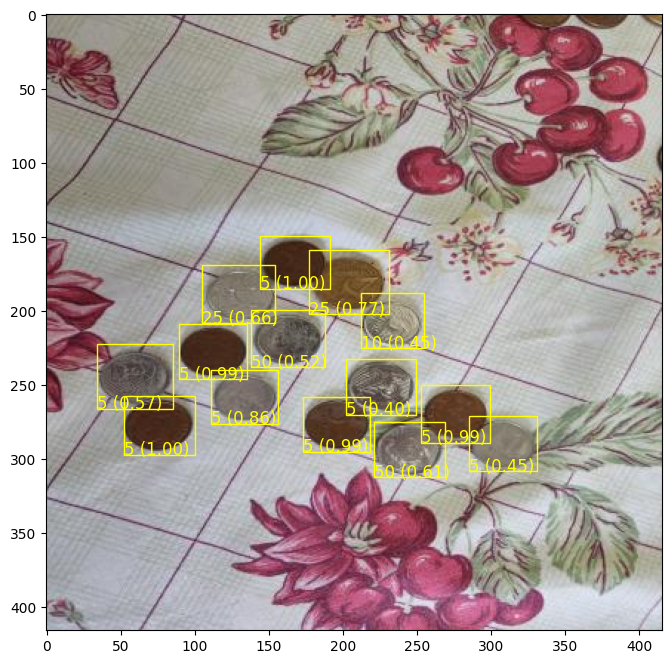

In [6]:
from money_counter.validation_utils import render_image_and_boxes

# convert pil image to tensor
image_t = torchvision.transforms.functional.to_tensor(image) # type: ignore
render_image_and_boxes(image_t, label_map, predicted=result, min_score=0.1)

